# Qualitative Bankruptcy - Problem Description and Solutions

Please follow the below steps to complete the project ( 60 points)
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score as score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Read the dataset and understand the features and target variable

In [152]:
col = ["Industrial Risk","Management Risk","Financial Flex","Credibility","Competitiveness","Operating Risk","Class"]
bankdf = pd.read_csv("Qualitative_Bankruptcy.data.txt",names = col)

In [153]:
bankdf.shape

(250, 7)

In [154]:
bankdf.head(2)

,Industrial Risk,Management Risk,Financial Flex,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB


In [155]:
bankdf['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [342]:
bankdf.isnull().sum()

Industrial Risk    0
Management Risk    0
Financial Flex     0
Credibility        0
Competitiveness    0
Operating Risk     0
Class              0
dtype: int64

In [357]:
bankdf.duplicated().sum()

147

In [358]:
bankdf.isna().sum().sum()

0

Total 250 records with 7 variables. 
Independent variables are the different type of internal risk with values Positive, Negative and Average.
Dependent variable tells us whether it is a bankruptcy case or not.
Since the dependent variable is given and is a binary class. We can perform classification model on the given dataset. 
Both independent and dependent variables are categorical in nature. 
Since we cannot perform any operation directly on categorical variable, 
       1. Convert independent variables into binaries using one hot encoding
       2. Convert dependent variables into binary using label encoding.
All independent variables have 3 classification for each variable.  Through one hot encoding, we get 6*3 = 18 variables.
There is no missing values, but 147 duplicates records are available. We are not removing those records as the dataset is small.
There is no na values.

# Encode independent features

In [270]:
bankftdf = pd.get_dummies(bankdf.iloc[:,0:-1])  #Performing one hot encoding on independent features

In [271]:
bankdf1 = bankftdf.copy() #taking copy of the encoded dataframe.

In [272]:
bankdf1.shape  #6 columns with 3 groups[P,N,A] in each column 

(250, 18)

In [274]:
labels = bankdf1.columns  # getting the columns in labels variable.
labels

Index(['Industrial Risk_A', 'Industrial Risk_N', 'Industrial Risk_P',
       'Management Risk_A', 'Management Risk_N', 'Management Risk_P',
       'Financial Flex_A', 'Financial Flex_N', 'Financial Flex_P',
       'Credibility_A', 'Credibility_N', 'Credibility_P', 'Competitiveness_A',
       'Competitiveness_N', 'Competitiveness_P', 'Operating Risk_A',
       'Operating Risk_N', 'Operating Risk_P'],
      dtype='object')

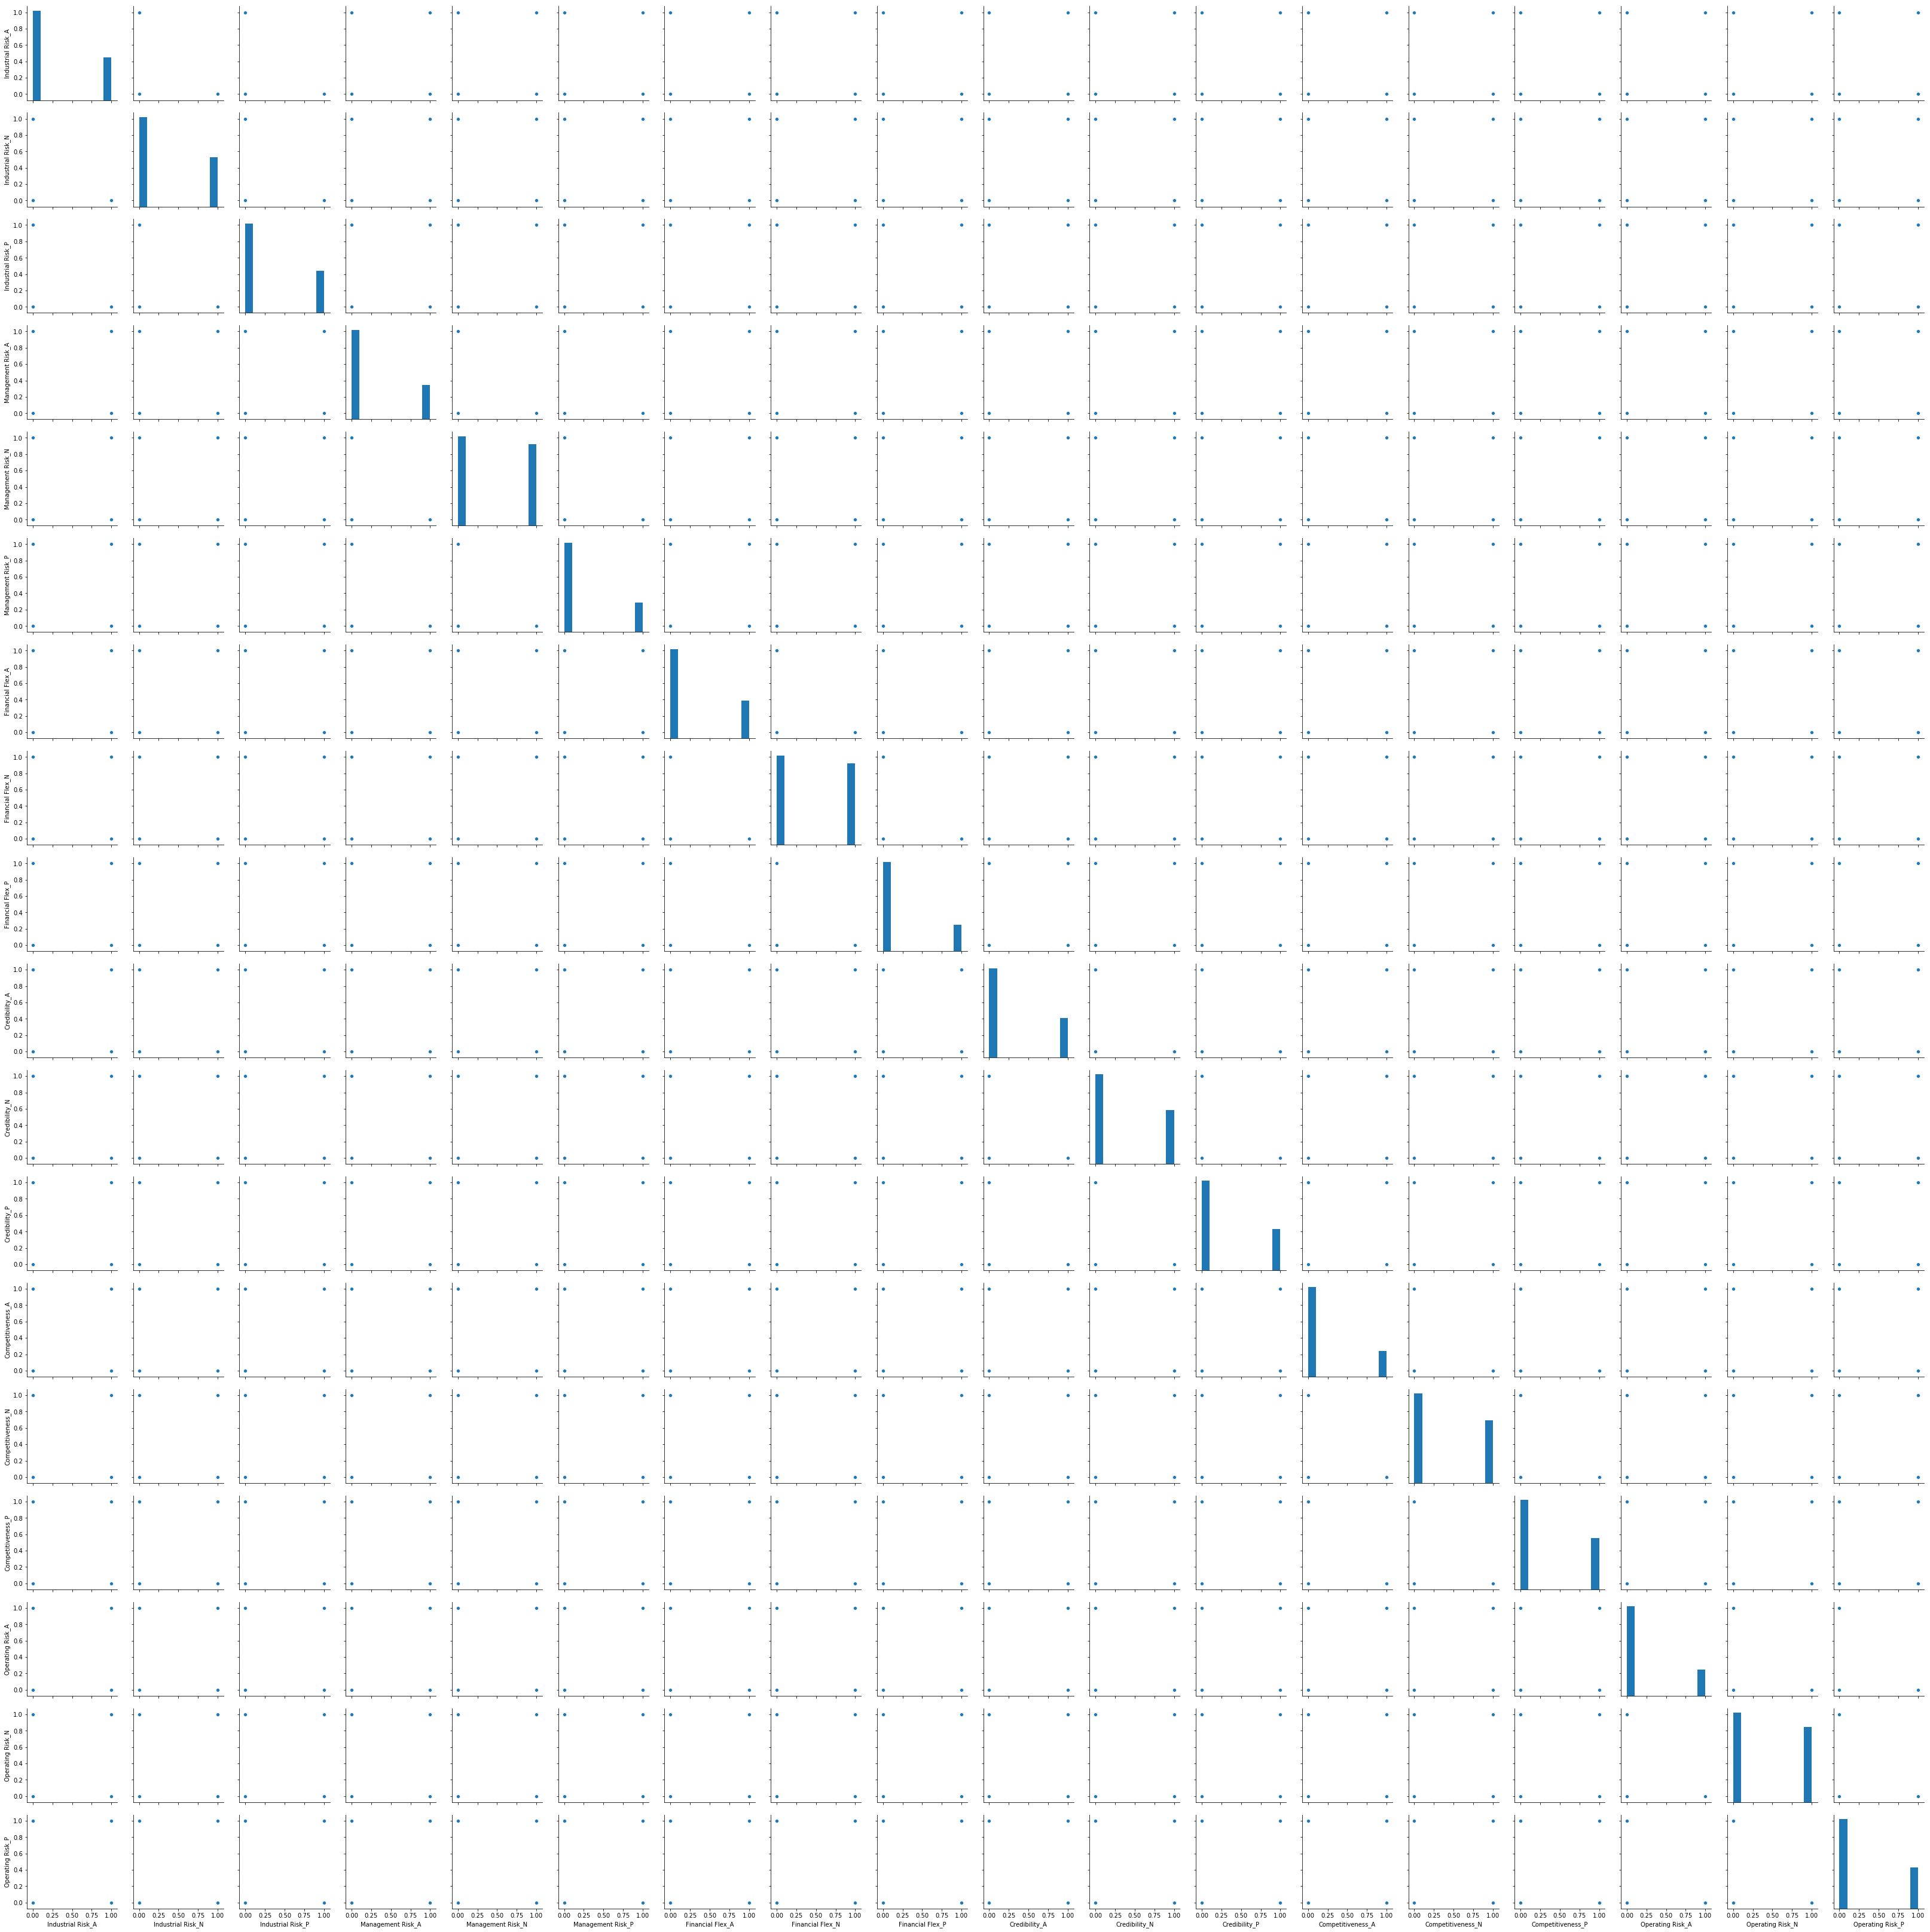

In [362]:
#since all the independent features are categorical in nature.  Pairplot will not give more information.
sns.pairplot(bankdf1)  

# Separate the dependant variable from the rest of the data

In [276]:
bankdf.Class= bankdf.Class.astype('category')

In [277]:
X = bankdf1  #After one hot encoding, we have taken all the independent data
Y = Le().fit_transform(bankdf.Class)  #Label encoding on target data.
#Y = bankdf.Class

In [278]:
#Independent variables 
X.head(2)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flex_A,Financial Flex_N,Financial Flex_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [363]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [364]:
bankdf1.head(2)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flex_A,Financial Flex_N,Financial Flex_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


# Split the dataset into training and test data ( Take 80:20 ratio). 2 points

In [281]:
Xtrain,Xtest,ytrain,ytest = train_test_split(bankdf1,Y,test_size = .2,random_state = 1)

In [282]:
print(Xtrain, "\n",Xtest)


     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
228                  1                  0                  0   
85                   1                  0                  0   
112                  0                  1                  0   
148                  0                  1                  0   
171                  1                  0                  0   
117                  0                  0                  1   
118                  0                  0                  1   
28                   0                  0                  1   
16                   0                  1                  0   
130                  1                  0                  0   
181                  0                  1                  0   
150                  0                  1                  0   
172                  0                  0                  1   
189                  1                  0                  0   
47                   1                  

In [283]:
print(ytrain, "\n",ytest)


[0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1] 
 [1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1]


# Apply PCA on the independent features of train data. 2 point

In [284]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [381]:
pca=PCA(n_components=18,random_state = 1) 

In [382]:
bankpca = pca.fit_transform(Xtrain)   #Applying pca on independent features.

In [383]:
bankpca

array([[ 1.13586913e+00, -1.17207373e+00,  3.52981627e-01, ...,
         5.38596478e-16, -4.12732658e-16, -2.61081860e-16],
       [ 4.88181933e-01, -6.54739646e-01, -3.87769696e-01, ...,
         5.97334775e-16,  3.88241530e-16, -1.48603705e-16],
       [-5.40849175e-01,  1.02315938e+00,  1.08505312e+00, ...,
        -2.11052746e-16, -9.74363011e-16,  2.56125755e-16],
       ...,
       [-8.43448382e-01,  6.86041500e-01, -5.14682350e-01, ...,
        -2.25492318e-17, -4.93351049e-17,  1.20055405e-17],
       [ 1.30701889e+00, -8.59084424e-01, -2.58310771e-01, ...,
        -2.90339366e-17, -7.53735179e-17,  5.59297080e-17],
       [-9.45279739e-01, -2.28089479e-01,  1.90123963e-01, ...,
         3.35959413e-17,  8.22011546e-18,  7.87461716e-17]])

In [384]:
pca.explained_variance_ratio_ 

array([3.02079985e-01, 1.14332502e-01, 9.71573254e-02, 9.02757178e-02,
       8.13753668e-02, 7.24378861e-02, 6.18659407e-02, 5.21928719e-02,
       4.79616385e-02, 4.02966929e-02, 2.41965142e-02, 1.33682121e-02,
       2.45934670e-03, 1.65339604e-32, 9.90958364e-33, 6.56810592e-33,
       4.76578762e-33, 2.81835137e-33])

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points

In [385]:
#Elbow method is used find the clusters which can cover more than 95% of the variance.   
#Assuming the above ask is on the number of clusters and not to find out reduced number of dimensions. 
#We are considering the entire independent features and grouping them into two clusters.  This cluster is same as the classification in target variable.
Cluster_error = []

In [386]:
crange = range(1,10)
for num_clusters in crange:
  clusters = KMeans(num_clusters,n_init = 10, random_state=2)
  clusters.fit(X)
  #labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":crange, "cluster_errors": Cluster_error } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,971.792000
1,2,737.196131
2,3,667.297476
3,4,608.600895
4,5,560.729754
5,6,526.285915
6,7,508.680407
7,8,483.722404
8,9,461.994960


Text(0, 0.5, 'Scree/Elbow Plot')

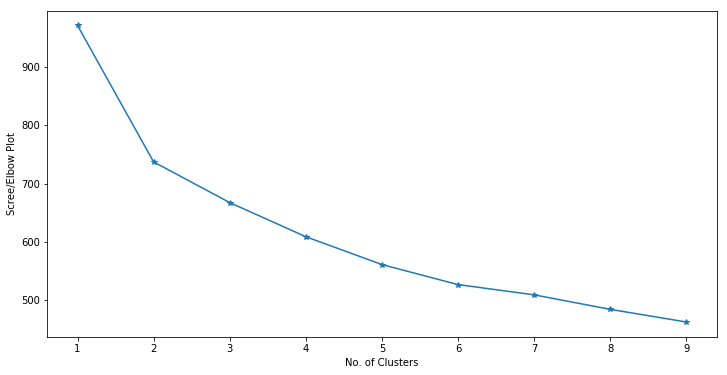

In [387]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "*" )
plt.xlabel("No. of Clusters")
plt.ylabel("Scree/Elbow Plot")

Conclusion: There can be 2 optimal clusters that can be formed. Target variable is binary classification.  


# Transform the data using PCA ( select optimum number of PCs). 4 points

In [ ]:
While applying PCA, we have transformed the data and stored in bankpca, as fit_transfom() is used.

In [388]:
bankpca

array([[ 1.13586913e+00, -1.17207373e+00,  3.52981627e-01, ...,
         5.38596478e-16, -4.12732658e-16, -2.61081860e-16],
       [ 4.88181933e-01, -6.54739646e-01, -3.87769696e-01, ...,
         5.97334775e-16,  3.88241530e-16, -1.48603705e-16],
       [-5.40849175e-01,  1.02315938e+00,  1.08505312e+00, ...,
        -2.11052746e-16, -9.74363011e-16,  2.56125755e-16],
       ...,
       [-8.43448382e-01,  6.86041500e-01, -5.14682350e-01, ...,
        -2.25492318e-17, -4.93351049e-17,  1.20055405e-17],
       [ 1.30701889e+00, -8.59084424e-01, -2.58310771e-01, ...,
        -2.90339366e-17, -7.53735179e-17,  5.59297080e-17],
       [-9.45279739e-01, -2.28089479e-01,  1.90123963e-01, ...,
         3.35959413e-17,  8.22011546e-18,  7.87461716e-17]])

In [389]:
pca.components_

array([[-7.85927805e-02,  1.69497103e-01, -9.09043223e-02,
        -8.42888957e-02,  2.25193304e-01, -1.40904408e-01,
        -1.97250780e-01,  3.76493318e-01, -1.79242538e-01,
        -1.11895910e-01,  3.45060995e-01, -2.33165085e-01,
        -1.47259504e-01,  4.11826983e-01, -2.64567479e-01,
         1.37001840e-03,  1.39702457e-01, -1.41072475e-01,
        -4.23933988e-01],
       [-4.49376069e-01,  4.63350438e-01, -1.39743688e-02,
        -3.96931202e-01,  3.77644295e-01,  1.92869073e-02,
         1.65471034e-01, -2.07878227e-01,  4.24071932e-02,
         1.88272033e-01, -1.72970072e-01, -1.53019615e-02,
         1.39218956e-01, -7.45941738e-02, -6.46247824e-02,
        -2.18653859e-01,  2.42932332e-01, -2.42784729e-02,
         9.00081823e-02],
       [-1.14640940e-01,  2.34968519e-02,  9.11440876e-02,
         2.61576843e-01,  9.35193610e-03, -2.70928779e-01,
        -1.24536000e-01, -1.48651879e-01,  2.73187879e-01,
        -3.37925441e-02,  6.22640109e-02, -2.84714668e-02,
    

Text(0, 0.5, 'Variance (%)')

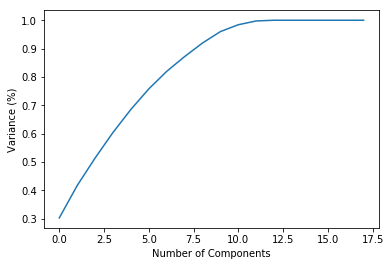

In [390]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

In [ ]:
Components between 8-10 explains 95% of the variance

Text(0, 0.5, 'Variance (%)')

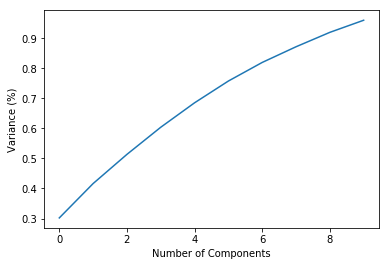

In [391]:
# Trying below steps to see how pca expalins the variance with 10 components.
pca10=PCA(n_components=10,random_state = 1)
PCAtrain10 = pca10.fit_transform(Xtrain)
pca10.explained_variance_ratio_
plt.figure()
plt.plot(np.cumsum(pca10.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

# Apply KMeans algorithm on the above transformed data

In [ ]:
#Considered only 10 PCA components.

In [393]:
PCAtrain10.shape

(200, 10)

In [416]:
crange = range(1,11)
Cluster_error = []
for num_clusters in crange:
  clusters = KMeans(num_clusters,n_init = 10, random_state=2)
  clusters.fit(PCAtrain10)
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":crange, "cluster_errors": Cluster_error } )
clusters_df[0:11]

,num_clusters,cluster_errors
0,1,794.927266
1,2,562.656079
2,3,504.508042
3,4,458.829710
4,5,419.732582
5,6,387.716034
6,7,368.640639
7,8,349.612153
8,9,327.852296
9,10,315.845150


Text(0, 0.5, 'Scree/Elbow Plot')

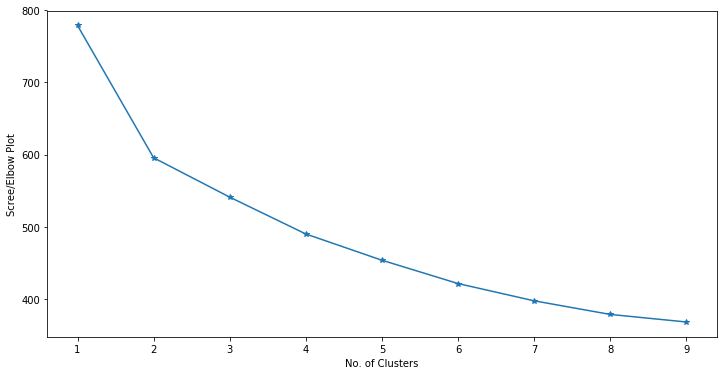

In [307]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "*" )
plt.xlabel("No. of Clusters")
plt.ylabel("Scree/Elbow Plot")

# Select optimal number of clusters and form clusters out of the train data.

In [457]:
#Kmeans on PCA applied train data
kmeans = KMeans(n_clusters=2,random_state=2).fit(PCAtrain10)# Number of clusters from above elbow method
labels = kmeans.predict(PCAtrain10)  # Getting the cluster labels
centroids = kmeans.cluster_centers_ # Centroid values
print("Centroid values")
print(centroids) 

Centroid values
[[ 1.233073   -0.09908783 -0.06580147  0.05037279 -0.01819214  0.01402952
   0.01874174 -0.03186237 -0.00204172  0.0204631 ]
 [-0.93021296  0.07475046  0.0496397  -0.03800052  0.01372389 -0.01058368
  -0.0141385   0.02403652  0.00154025 -0.01543708]]


In [459]:
labels

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1])

In [482]:
print("Training Accuracy",score(ytrain,labels)*100)

Training Accuracy 99.0


In [463]:
#Kmeans on train data.
kmeans1 = KMeans(n_clusters=2,random_state=2).fit(Xtrain)# Number of clusters from above elbow method
labels1 = kmeans1.predict(Xtrain)  # Getting the cluster labels
centroids1 = kmeans1.cluster_centers_ # Centroid values
print("Centroid values")
print(centroids1) 
print("Accuracy score of Kmeans on train data", score(ytrain,labels1)*100)

Centroid values
[[ 2.79069767e-01  5.11627907e-01  2.09302326e-01  1.86046512e-01
   6.97674419e-01  1.16279070e-01  4.65116279e-02  9.53488372e-01
   1.94289029e-16  1.74418605e-01  8.02325581e-01  2.32558140e-02
   3.48837209e-02  9.53488372e-01  1.16279070e-02  2.44186047e-01
   5.58139535e-01  1.97674419e-01 -2.22044605e-16]
 [ 3.94736842e-01  2.45614035e-01  3.59649123e-01  3.33333333e-01
   3.24561404e-01  3.42105263e-01  4.73684211e-01  1.05263158e-01
   4.21052632e-01  4.12280702e-01  5.26315789e-02  5.35087719e-01
   3.85964912e-01  8.77192982e-03  6.05263158e-01  2.36842105e-01
   3.42105263e-01  4.21052632e-01  1.00000000e+00]]
Accuracy score of Kmeans on train data 99.0


# Create a new column in the train data and populate it with the cluster labels.

In [464]:
Xtrain['Cluster_Labels'] = labels                                                                                                                                                                 

In [465]:
Xtrain.head(2)

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flex_A,Financial Flex_N,Financial Flex_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Cluster_Labels
228,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
85,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# Transform the test data using the same PCA object that was fit on the train data. 4 points

In [466]:
#Considering the pca10 where only 10 pca components are choosen. 
PCAtest10 = pca10.transform(Xtest)

In [467]:
PCAtest10

array([[-0.43372777, -0.27545235,  0.97776443,  0.58249887, -0.61221667,
         0.56409337,  0.08876492, -0.28717618, -0.10619898,  0.04761762],
       [ 0.73562086, -0.20986959, -0.33662875,  0.06157139,  0.51947088,
         0.76363469, -0.83419823,  0.90322354, -0.35489418,  0.69300266],
       [ 1.07925362, -0.75585562, -0.179524  ,  0.42630563, -0.71766411,
        -0.89521881,  0.46208207,  0.10616956, -0.38149638,  0.32516741],
       [ 1.44535133, -0.39749823,  0.10075672, -0.07733824, -0.26255868,
        -0.46436403, -0.01566645,  0.30989637, -0.71512227, -0.443814  ],
       [-1.40951597, -0.37288789,  0.07395887,  0.66772081,  0.53146248,
         0.10297984, -0.80093789, -0.8187045 ,  0.33769387, -0.32623997],
       [ 1.12355759, -0.73667203,  0.55876665,  1.05968265, -0.38368195,
         0.08102367, -0.41933025,  0.12678393,  0.36479221,  0.07806104],
       [-0.48954347, -0.04706962,  0.02386516, -0.47768712,  0.8279518 ,
        -0.534637  ,  0.53469798, -0.56674684

In [ ]:
# Xtest1 = kmeans.transform(Xtest)
# Xtest1

# Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points

In [468]:
testlabels = kmeans.predict(PCAtest10)

In [470]:
Xtest['Cluster_labels'] = testlabels
Xtest.head()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flex_A,Financial Flex_N,Financial Flex_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Cluster_labels
67,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1
249,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0
230,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
161,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
91,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1


# Apply SVC model on train dataset and predict target for test dataset. 6 points

In [471]:
from sklearn.svm import SVC


In [473]:
#Applying SVC on train dataset.
SVCModel = SVC().fit(Xtrain,ytrain)
ySVCpred = SVCModel.predict(Xtest)
ySVCpred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [474]:
#Applying SVC on PCA components.

SVCModel = SVC().fit(PCAtrain10,ytrain)
ySVCpred1 = SVCModel.predict(PCAtest10)
ySVCpred1

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

# Check accuracy and confusion matrix. 2 point

In [480]:
#Accuracy and confusion matrix while SVC is applied on train data directly
print("Score of SVC on testdataset", score(ytest,ySVCpred)*100)
print("Confusion matrix: \n", confusion_matrix(ytest,ySVCpred))

Score of SVC on testdataset 100.0
Confusion matrix: 
 [[21  0]
 [ 0 29]]


In [477]:
#Accuracy Score and confusion matrix for SVC when applied on top of PCA 
print("Score of SVC on testdataset", score(ytest,ySVCpred1)*100)
print("Confusion matrix: \n", confusion_matrix(ytest,ySVCpred1))


Score of SVC on testdataset 100.0
Confusion matrix: 
 [[21  0]
 [ 0 29]]


In [485]:
print("Kmeans clustering - Training\n",confusion_matrix(ytrain,labels))
print("Kmeans clustering - Test\n",confusion_matrix(ytest,testlabels))
print("Accuracy score of Kmeans on train data", score(ytrain,labels)*100)
print("Accuracy score of Kmeans on test data", score(ytest,testlabels)*100)

Kmeans clustering - Training
 [[ 85   1]
 [  1 113]]
Kmeans clustering - Test
 [[21  0]
 [ 0 29]]
Accuracy score of Kmeans on train data 99.0
Accuracy score of Kmeans on test data 100.0
